In [1]:
from time import time
import unittest
import numpy as np
from sklearn.metrics import silhouette_score

import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1' 

from keras.datasets import mnist
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
# config.gpu_options.per_process_gpu_memory_fraction = 0.48
set_session(tf.Session(config=config))

import sys  
sys.path.append('../')
from util.util import *
from util import importNotebook
from module.autoencoder import VAE, ConvVAE

Using TensorFlow backend.


importing Jupyter notebook from ../module/autoencoder.ipynb


# Example of Convolutional VAE

(60000, 28, 28, 1)
(10000, 28, 28, 1)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.3004 - val_loss: 0.2424

Epoch 00001: val_loss improved from inf to 0.24236, saving model to ../model/temp/Conv_AutoEncoder.01-0.30-0.24.hdf5
Epoch 2/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.2302 - val_loss: 0.2202

Epoch 00002: val_loss improved from 0.24236 to 0.22017, saving model to ../model/temp/Conv_AutoEncoder.02-0.23-0.22.hdf5
Epoch 3/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.2163 - val_loss: 0.2126

Epoch 00003: val_loss improved from 0.22017 to 0.21259, saving model to ../model/temp/Conv_AutoEncoder.03-0.22-0.21.hdf5
Epoch 4/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.2099 - val_loss: 0.2075

Epoch 00004: val_loss improved from 0.21259 to 0.20748, saving model to ../model/temp/Conv_AutoEncoder.04-0.21-0.21.hdf5
Epoch 5/

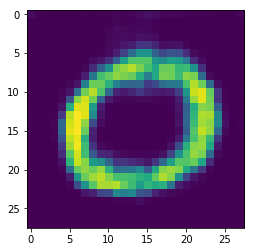

In [2]:
# Load dataset
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
xTrain = xTrain.astype('float32') / 255.
xTest = xTest.astype('float32') / 255.
numTrain = len(xTrain)
numTest = len(xTest)
sizeDigit = xTrain.shape[1:]
dimInput = [*xTrain.shape[1:], 1]
xTrain = xTrain.reshape((numTrain, *dimInput))
xTest = xTest.reshape((numTest, *dimInput))
print(xTrain.shape)
print(xTest.shape)

# Set parameters
numEpochs = 10
sizeBatch = 128
sizeKernel = 3
layerDense = [16, 2]
layerConv = [4, 16]
ratRecon = 1
nameOptim = 'adam'
modelPath = '../model/temp/'
patience = 3

# Initialize and train
convVAE = ConvVAE(dimInput, layerDense=layerDense, layerConv=layerConv, ratRecon=ratRecon)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 numEpochs=numEpochs,
                                 sizeBatch=sizeBatch,
                                 tempPathBest=modelPath)

# Get the encoder and decoder 
encoder = convVAE.encoder
decoder = convVAE.decoder
encoder.summary()
decoder.summary()

# Encode testing dataset and get generated reconstruction
encode = encoder.predict(xTest)
generate = decoder.predict(np.array([[0, 0]]))
plt.imshow(generate.reshape(sizeDigit))   